In [1]:
# https://ithelp.ithome.com.tw/articles/10264846
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('clean_train.csv')
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Name_length,IsAlone,Title,Survived
0,1,3,0,-0.600854,1,0,-0.503595,1,2,-0.434672,0,Mr,0
1,2,1,1,0.612019,1,0,0.734503,2,2,2.511806,0,Mrs,1
2,3,3,1,-0.297635,0,0,-0.490544,1,1,-0.539904,1,Miss,1
3,4,1,1,0.384606,1,0,0.382925,1,2,1.775186,0,Mrs,1
4,5,3,0,0.384606,0,0,-0.488127,1,1,-0.329441,1,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,0,-0.221831,0,0,-0.392417,1,1,-0.645135,1,Other,0
887,888,1,1,-0.828267,0,0,-0.063719,1,1,0.091485,1,Miss,1
888,889,3,1,-0.613397,1,2,-0.190364,1,4,1.354261,0,Miss,0
889,890,1,0,-0.297635,0,0,-0.063719,2,1,-0.645135,1,Mr,1


In [ ]:
df.describe(include='all')

In [4]:
df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
FamilySize     0
Name_length    0
IsAlone        0
Title          0
Survived       0
dtype: int64

In [13]:
# 特徵工程 (One-hot encoding)
df = pd.concat(
    [df,pd.get_dummies(df["Title"])], 
    axis=1
    )
df = df.drop("Title", 1)
df

C:\Users\Student\AppData\Local\Temp\ipykernel_18632\824345929.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("Title", 1)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Name_length,IsAlone,Survived,Master,Miss,Mr,Mrs,Other
0,1,3,0,-0.600854,1,0,-0.503595,1,2,-0.434672,0,0,0,0,1,0,0
1,2,1,1,0.612019,1,0,0.734503,2,2,2.511806,0,1,0,0,0,1,0
2,3,3,1,-0.297635,0,0,-0.490544,1,1,-0.539904,1,1,0,1,0,0,0
3,4,1,1,0.384606,1,0,0.382925,1,2,1.775186,0,1,0,0,0,1,0
4,5,3,0,0.384606,0,0,-0.488127,1,1,-0.329441,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,0,-0.221831,0,0,-0.392417,1,1,-0.645135,1,0,0,0,0,0,1
887,888,1,1,-0.828267,0,0,-0.063719,1,1,0.091485,1,1,0,1,0,0,0
888,889,3,1,-0.613397,1,2,-0.190364,1,4,1.354261,0,0,0,1,0,0,0
889,890,1,0,-0.297635,0,0,-0.063719,2,1,-0.645135,1,1,0,0,1,0,0


In [9]:
# 切分特徵X與標籤Y
X = df.drop("Survived", 1)
Y = df["Survived"]

C:\Users\Student\AppData\Local\Temp\ipykernel_18632\2393415439.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("Survived", 1)


In [14]:
def use_RandomForestClassifier_evaluation_metrics_on_test_set(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size = 0.2 ,stratify=Y, random_state = 9527)

    # 標準化
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # RandomForestClassifier訓練模型
    model = RandomForestClassifier(criterion='entropy', random_state=9527)
    model.fit(X_train_scaled, Y_train)

    # 預測
    y_predict_result = model.predict(X_test_scaled)

    # 回傳evaluation_metrics_on_test_set
    return {
        'accuracy' : accuracy_score(Y_test, y_predict_result),
        'roc' : roc_auc_score(Y_test, y_predict_result),
        'precision' : precision_score(Y_test, y_predict_result),
        'recall' : recall_score(Y_test, y_predict_result),
        'f1' : f1_score(Y_test, y_predict_result),
        'Feature Count' : len(X.columns)
        }

In [15]:
res = pd.DataFrame(use_RandomForestClassifier_evaluation_metrics_on_test_set(X,Y), index=['ALL'])
res

,accuracy,roc,precision,recall,f1,Feature Count
ALL,0.815642,0.793281,0.8,0.695652,0.744186,16


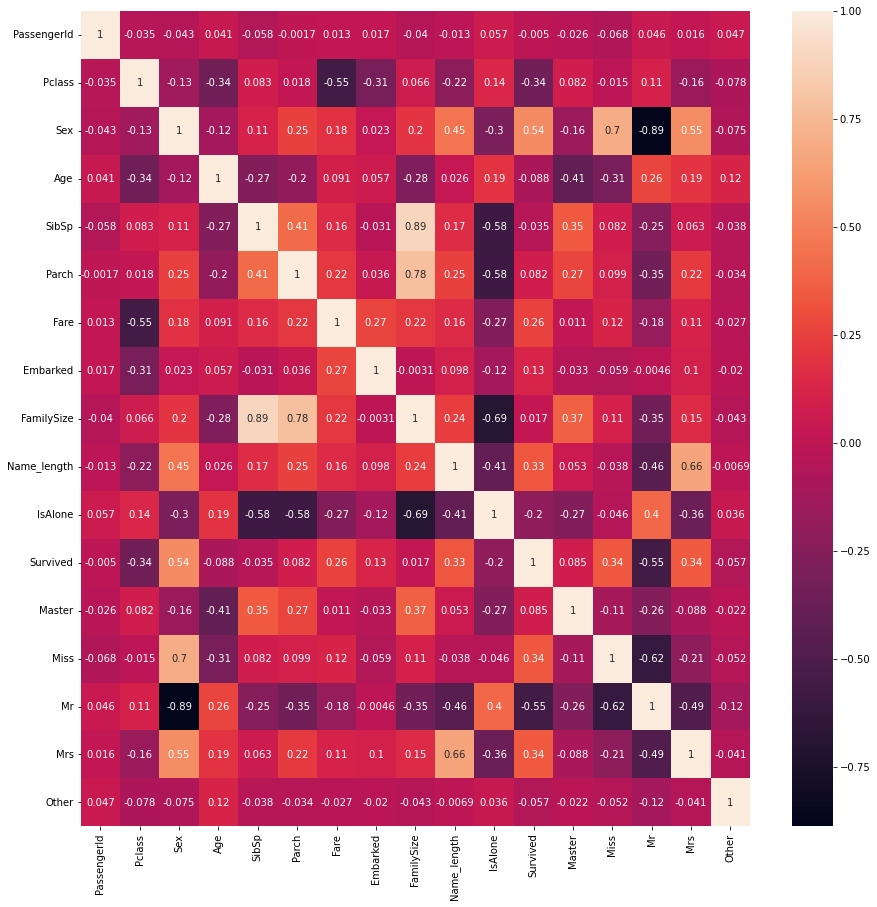

In [16]:
# Correlation Matrix
plt.figure(figsize=(15,15))
cor = df.corr() 
sns.heatmap(cor, annot=True)
plt.show()

In [17]:
# 取得具有與其他部分特徵高度相關的某特徵絕對值
cor_target = abs(cor["FamilySize"])

# 選擇高度相關的特徵（閾值 = 0.2）
relevant_features = cor_target[cor_target>0.2]

# 選擇特徵名稱
names = [index for index, value in relevant_features.iteritems()]

# 刪除目標特徵
names.remove('FamilySize')

print(names)

['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_length', 'IsAlone', 'Master', 'Mr']


In [18]:
res = res.append(
    pd.DataFrame(
        use_RandomForestClassifier_evaluation_metrics_on_test_set(
            X[names],
            Y), 
            index=['Remove High Corr']))
res

C:\Users\Student\AppData\Local\Temp\ipykernel_18632\1555212679.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(


,accuracy,roc,precision,recall,f1,Feature Count
ALL,0.815642,0.793281,0.800000,0.695652,0.744186,16
Remove High Corr,0.782123,0.766008,0.727273,0.695652,0.711111,9


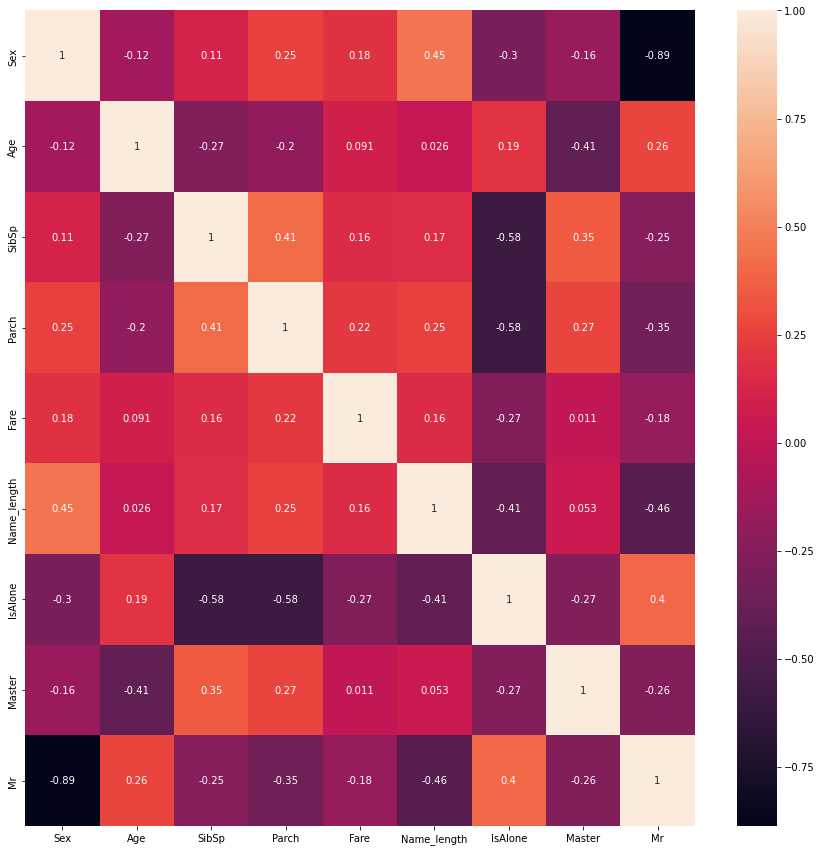

In [19]:
# Correlation Matrix
plt.figure(figsize=(15,15))
cor = X[names].corr() 
sns.heatmap(cor, annot=True,)
plt.show()

In [20]:
def univariate_selection(X, Y, k=10):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state = 9527)
    
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # User SelectKBest to select top 10 features based on f-test
    selector = SelectKBest(f_classif)
    X_new = selector.fit_transform(X_train_scaled, Y_train)

    feature_idx = selector.get_support()

    feature_names = X.columns[feature_idx]
    
    return feature_names

In [21]:
univariate_selection(X,Y)

Index(['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Name_length', 'IsAlone',
       'Miss', 'Mr', 'Mrs'],
      dtype='object')

In [22]:
res = res.append(
    pd.DataFrame(
        use_RandomForestClassifier_evaluation_metrics_on_test_set(
            X[univariate_selection(X,Y)],
            Y), 
            index=['Univariate Selection']))
res

C:\Users\Student\AppData\Local\Temp\ipykernel_18632\1501557846.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(


,accuracy,roc,precision,recall,f1,Feature Count
ALL,0.815642,0.793281,0.800000,0.695652,0.744186,16
Remove High Corr,0.782123,0.766008,0.727273,0.695652,0.711111,9
Univariate Selection,0.810056,0.794137,0.769231,0.724638,0.746269,10


In [23]:
# Recursive Feature Elimination
def rfe_selection( X , Y, k=10):
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, 
        Y, 
        test_size = 0.2, 
        stratify=Y, 
        random_state = 9527)
    
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = RandomForestClassifier(
        criterion='entropy', 
        random_state=9527
        )
    rfe = RFE(model)
    rfe = rfe.fit(X_train_scaled, Y_train)

    feature_names = X.columns[rfe.get_support()]
    
    return feature_names


In [24]:
rfe_selection(X,Y,10)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'FamilySize',
       'Name_length', 'Mr'],
      dtype='object')

In [25]:
res = res.append(
    pd.DataFrame(
        use_RandomForestClassifier_evaluation_metrics_on_test_set(
            X[rfe_selection(X,Y)],
            Y), 
            index=['RFE']))

res

C:\Users\Student\AppData\Local\Temp\ipykernel_18632\423503298.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(


,accuracy,roc,precision,recall,f1,Feature Count
ALL,0.815642,0.793281,0.800000,0.695652,0.744186,16
Remove High Corr,0.782123,0.766008,0.727273,0.695652,0.711111,9
Univariate Selection,0.810056,0.794137,0.769231,0.724638,0.746269,10
RFE,0.815642,0.790580,0.810345,0.681159,0.740157,8


In [26]:
def feature_importance(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 9527)
    
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = RandomForestClassifier()
    model = model.fit(X_train_scaled,Y_train)

    plt.figure(figsize=(10, 12))
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.sort_values().plot(kind='barh')

    plt.show()
    return model


def select_features_from_model(model,X):
    
    model = SelectFromModel(model, prefit=True, threshold=0.013)
    feature_idx = model.get_support()
    feature_names = X.columns[feature_idx]
        
    return feature_names


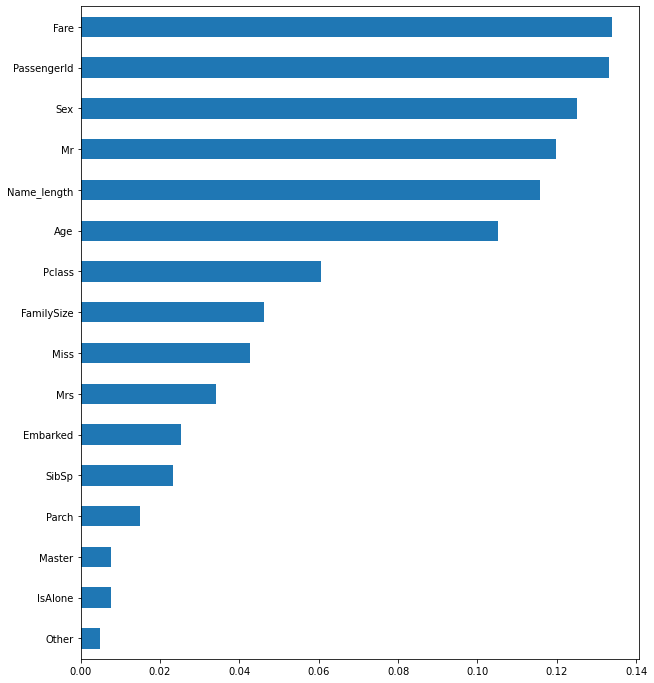

In [27]:
model = feature_importance(X,Y)
feature_imp_feature_names = select_features_from_model(model,X)

In [28]:
feature_imp_feature_names

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'Name_length', 'Miss', 'Mr', 'Mrs'],
      dtype='object')

In [29]:
res = res.append(
    pd.DataFrame(
        use_RandomForestClassifier_evaluation_metrics_on_test_set(
            X[feature_imp_feature_names],
            Y), 
            index=['Feature Importance']))
res

C:\Users\Student\AppData\Local\Temp\ipykernel_18632\273488477.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(


,accuracy,roc,precision,recall,f1,Feature Count
ALL,0.815642,0.793281,0.800000,0.695652,0.744186,16
Remove High Corr,0.782123,0.766008,0.727273,0.695652,0.711111,9
Univariate Selection,0.810056,0.794137,0.769231,0.724638,0.746269,10
RFE,0.815642,0.790580,0.810345,0.681159,0.740157,8
Feature Importance,0.815642,0.793281,0.800000,0.695652,0.744186,13
